<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
# Example warning (will not be displayed)
warnings.warn("This is a warning!")
print("Script continues...")

Script continues...


#### Load 'german_credit_data.csv' and store it in a dataframe

In [3]:
df = pd.read_csv("german_credit_data.csv")

#### View top 5 rows

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [5]:
df.shape

(1000, 11)

#### Columns

In [6]:
df.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [7]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [8]:
df = df.fillna('Unknown')
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [9]:
column = ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']
for i in column:
    print(f'Unique values in {i} = {df[i].unique()}')

Unique values in Unnamed: 0 = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

##### Create a New column Id by replacing unnamed column

In [10]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [11]:
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [14]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [15]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [16]:
grouped_srp=df.groupby(['Sex','Risk','Purpose'])['Id'].count()
grouped_srp

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [17]:
grouped_prs=df.groupby(['Purpose','Risk','Sex'])['Id'].count()
grouped_prs

Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

In [18]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

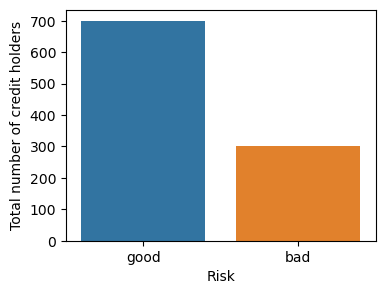

In [19]:
plt.figure(figsize=(4,3))
plt.ylabel("Total number of credit holders")
sns.countplot(x= df['Risk'],hue=df['Risk'])
plt.show()

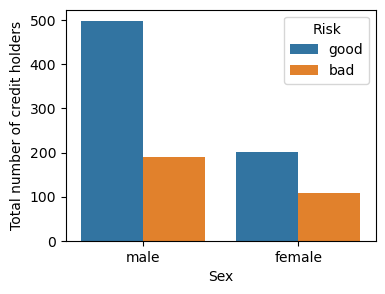

In [20]:
plt.figure(figsize=(4,3))
plt.ylabel("Total number of credit holders")
sns.countplot(x= df['Sex'],hue=df['Risk'])
plt.show()

In [21]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

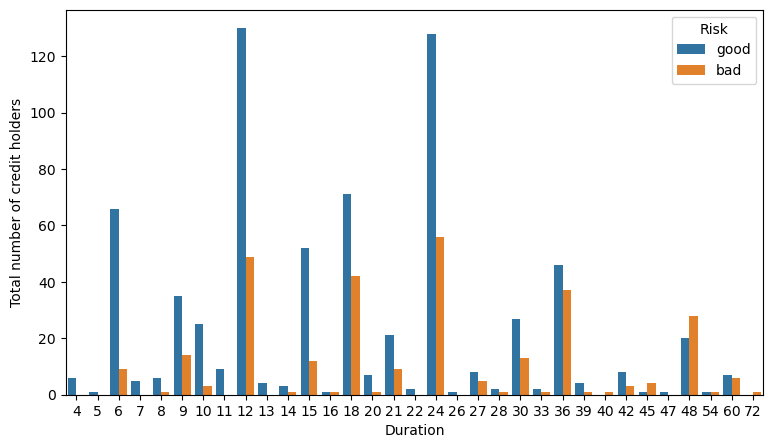

In [22]:
plt.figure(figsize=(9,5))
plt.ylabel("Total number of credit holders")
sns.countplot(x= df['Duration'],hue=df['Risk'])
plt.show()

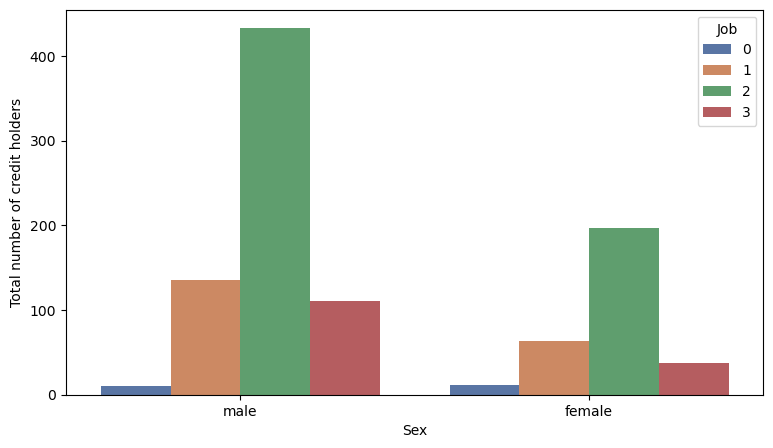

In [23]:
plt.figure(figsize=(9,5))
plt.ylabel("Total number of credit holders")
sns.countplot(x= df['Sex'],hue=df['Job'], palette='deep')
plt.show()

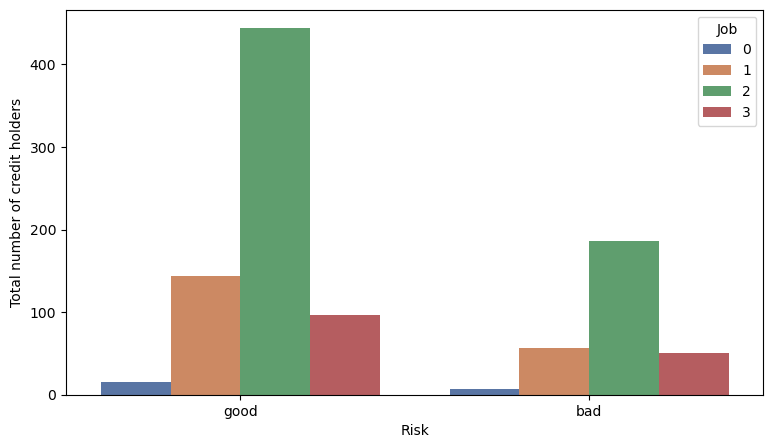

In [24]:
plt.figure(figsize=(9,5))
plt.ylabel("Total number of credit holders")
sns.countplot(x= df['Risk'],hue=df['Job'], palette='deep')
plt.show()

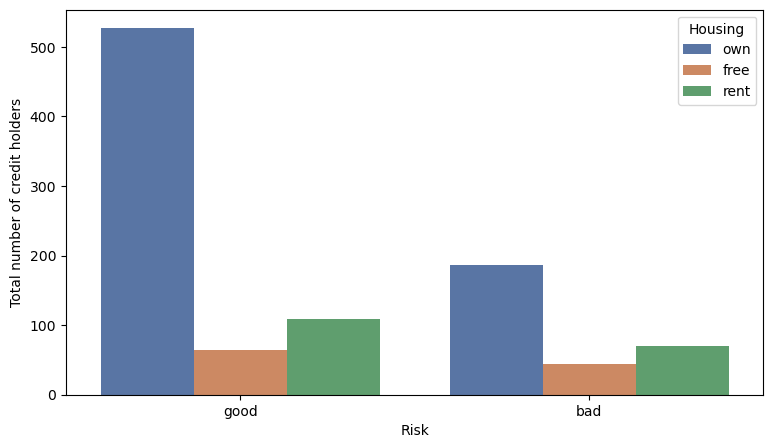

In [25]:
plt.figure(figsize=(9,5))
plt.ylabel("Total number of credit holders")
sns.countplot(x= df['Risk'],hue=df['Housing'], palette='deep')
plt.show()

In [26]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

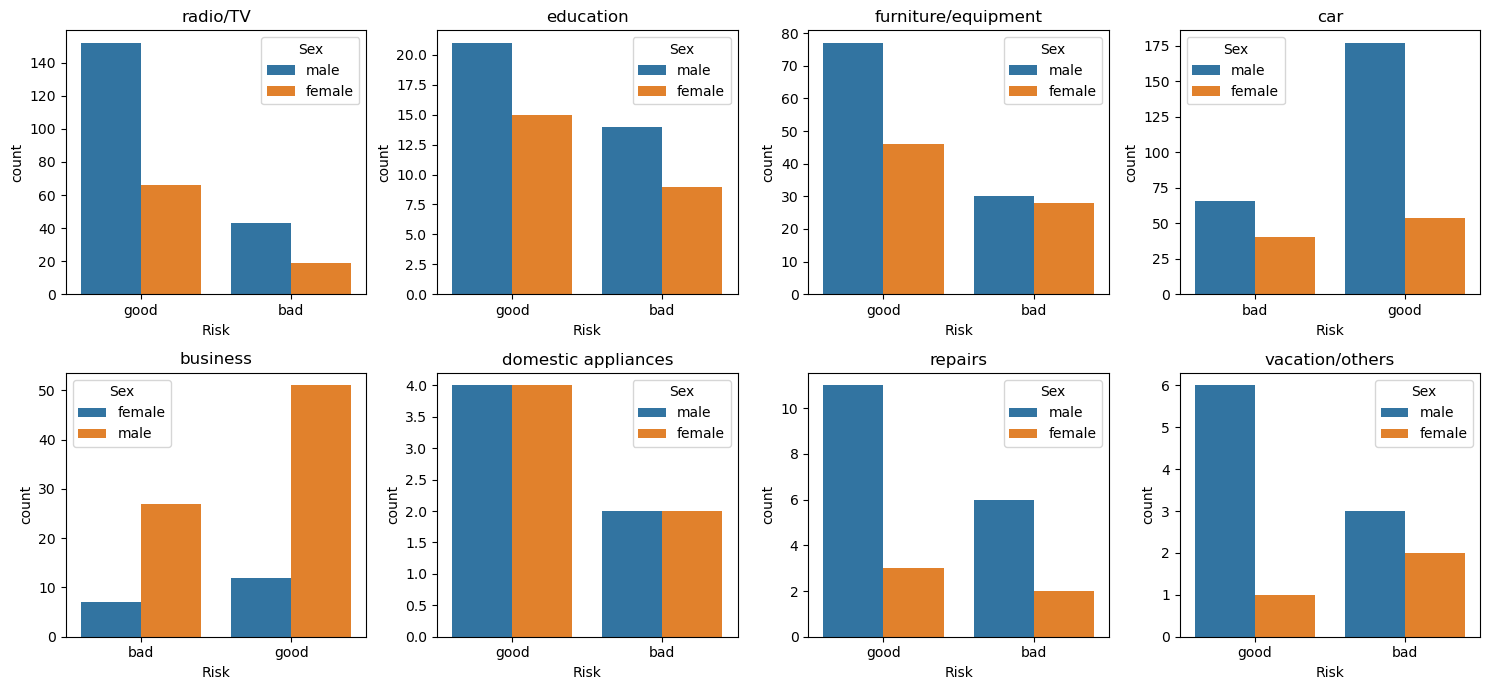

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

row, column = 0, 0

for item in df['Purpose'].unique():
    sns.countplot(data=df[df['Purpose'] == item],x='Risk',hue='Sex',ax=axes[row, column])
    axes[row, column].set_title(item)
    column += 1
    if column == 4:
        column = 0
        row += 1

plt.tight_layout()
plt.show()

In [28]:
df['Job'].unique()

array([2, 1, 3, 0])

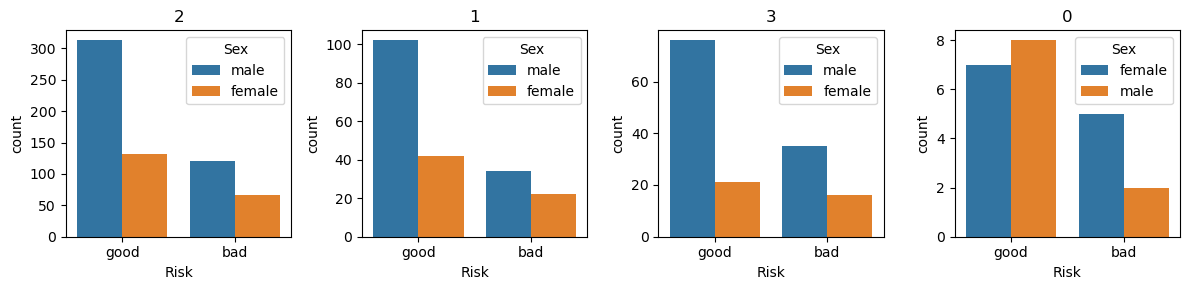

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

column= 0
for item in df['Job'].unique():
    sns.countplot(data=df[df['Job'] == item],x='Risk',hue='Sex',ax=axes[column])
    axes[column].set_title(item)
    column+=1
plt.tight_layout()
plt.show()

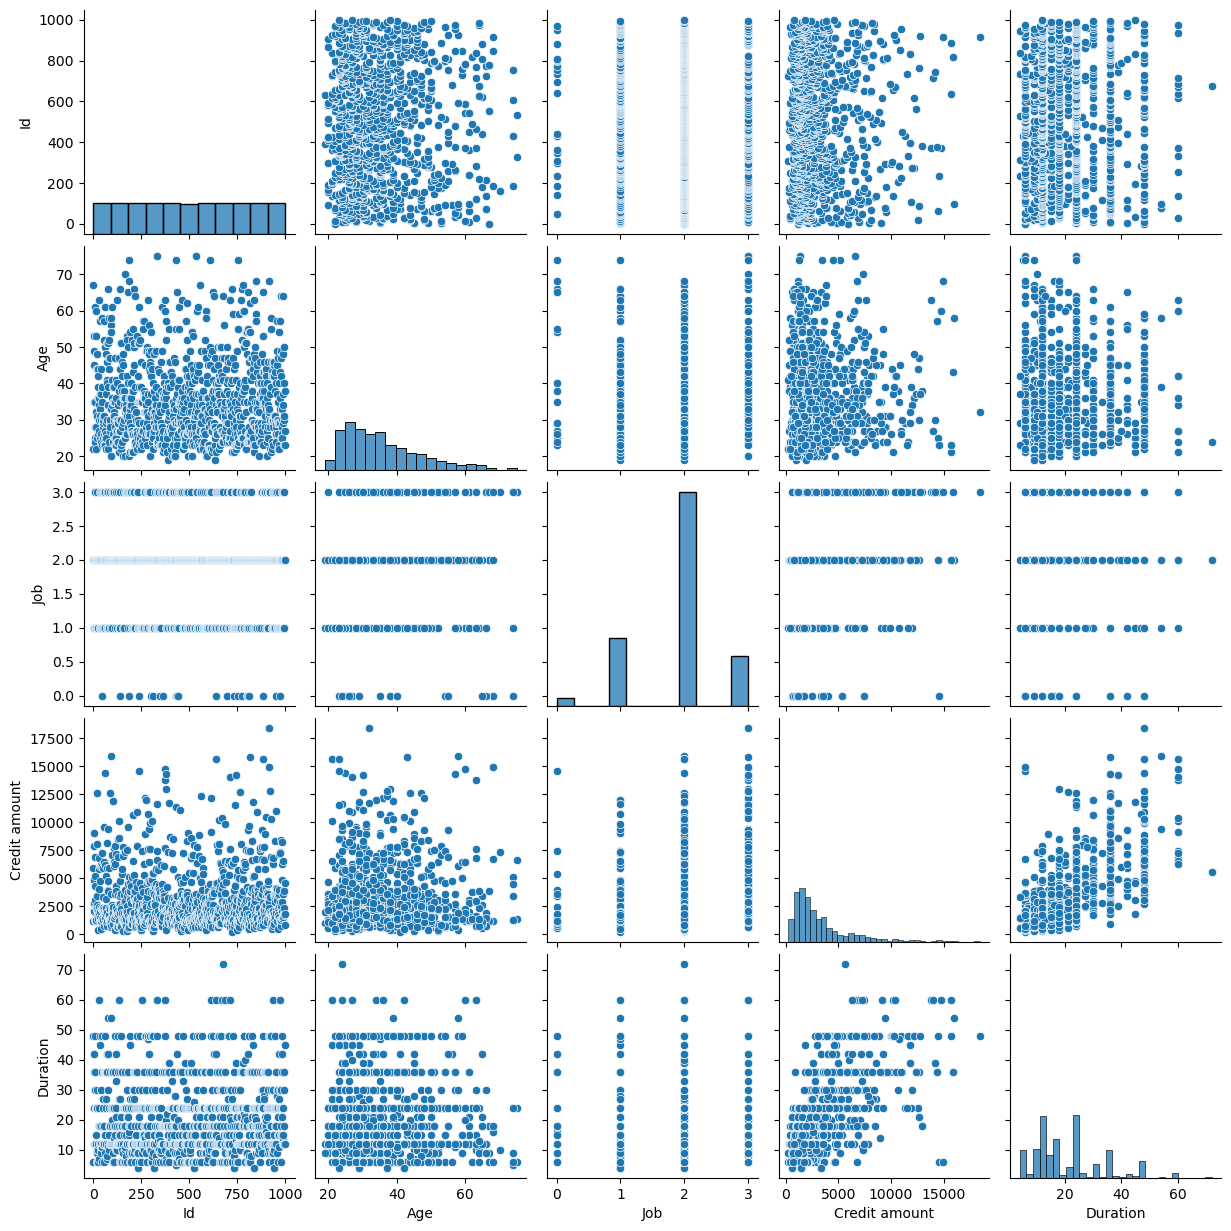

In [30]:
sns.pairplot(df)
plt.show()

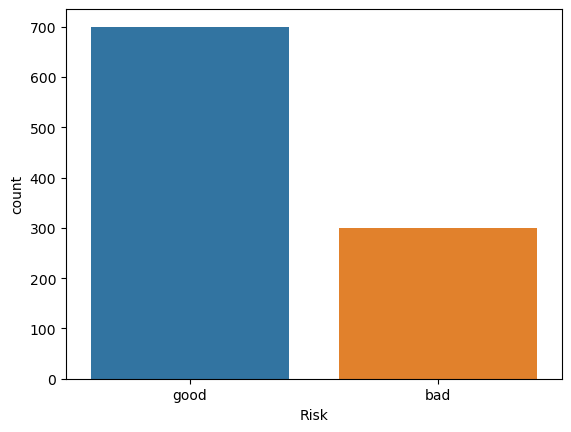

In [31]:
sns.countplot(df,x=df['Risk'],hue=df['Risk'])
plt.show()

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [32]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [33]:
dummies = pd.get_dummies(df['Purpose'],dtype=int)
df= df.drop(columns='Purpose')
df=df.drop_duplicates()
newdf = pd.concat([df, dummies], axis=1)
newdf.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,male,2,own,Unknown,little,1169,6,good,0,0,0,0,0,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,bad,0,0,0,0,0,1,0,0
2,2,49,male,1,own,little,Unknown,2096,12,good,0,0,0,1,0,0,0,0
3,3,45,male,2,free,little,little,7882,42,good,0,0,0,0,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,bad,0,1,0,0,0,0,0,0


#### Use label encoding for rest of the categorical data

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [35]:
newdf.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Risk', 'business',
       'car', 'domestic appliances', 'education', 'furniture/equipment',
       'radio/TV', 'repairs', 'vacation/others'],
      dtype='object')

In [36]:
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Risk']

for col in cols:
    newdf[col] = le.fit_transform(newdf[col])

In [37]:
newdf.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,67,1,2,1,0,1,1169,6,1,0,0,0,0,0,1,0,0
1,1,22,0,2,1,1,2,5951,48,0,0,0,0,0,0,1,0,0
2,2,49,1,1,1,1,0,2096,12,1,0,0,0,1,0,0,0,0
3,3,45,1,2,0,1,1,7882,42,1,0,0,0,0,1,0,0,0
4,4,53,1,2,0,1,1,4870,24,0,0,1,0,0,0,0,0,0


### Check the unique values in the new dataframe

In [38]:
for i in newdf.columns:
    print(f'Unique values in {i} are : {newdf[i].unique()} ')

Unique values in Id are : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

### Plot heatmap

<Axes: >

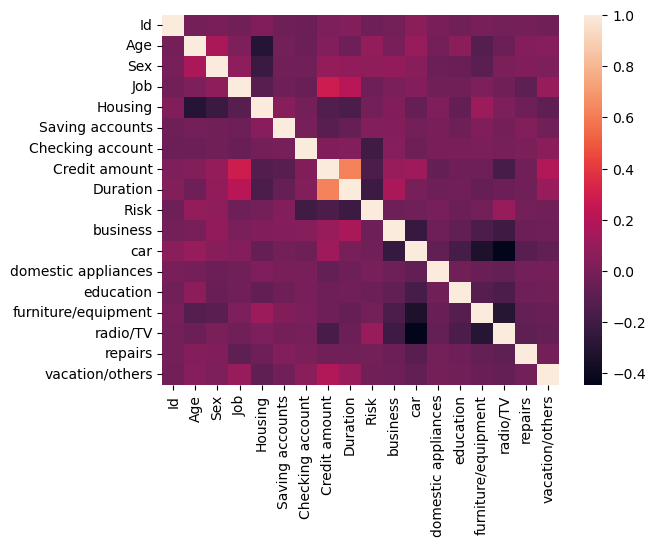

In [39]:
sns.heatmap(newdf.corr())

## Select the Dependent(target) and Independent Variables:

In [40]:
newdf.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Risk', 'business',
       'car', 'domestic appliances', 'education', 'furniture/equipment',
       'radio/TV', 'repairs', 'vacation/others'],
      dtype='object')

In [41]:
X = newdf[['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration','business','car',
       'domestic appliances', 'education', 'furniture/equipment', 'radio/TV',
       'repairs', 'vacation/others']]

In [42]:
y = newdf['Risk']

# Standardize the data

In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:
scaler = StandardScaler()

In [45]:
xcolumns = X.columns

In [46]:
X = scaler.fit_transform(X)

In [47]:
X = pd.DataFrame(X , columns=xcolumns)

In [48]:
X.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,-1.730320,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.726856,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,-1.723391,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,-1.719927,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,-1.716463,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [51]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [52]:
model = RandomForestClassifier()

In [53]:
forest_params = {'max_depth': [3,5,10,15], 'max_features': ['auto','sqrt',0.5]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')

In [54]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 0.5]},
             scoring='accuracy')

In [55]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [56]:
metrics.accuracy_score(y_test,y_pred)

0.74

In [57]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 32,  49],
       [ 29, 190]])

In [58]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45        81
           1       0.79      0.87      0.83       219

    accuracy                           0.74       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.72      0.74      0.73       300



In [59]:
scores = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(scores)

[0.71  0.72  0.735 0.74  0.735]


#### Visualize the confusion matrix

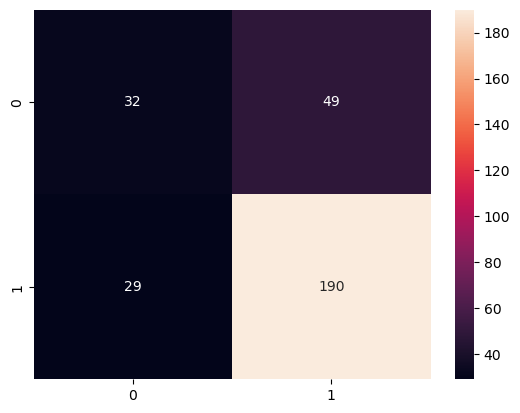

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = True, fmt='d')
plt.show()

## SupportVectorClassifier:

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC()

In [63]:
svc.fit(X_train,y_train)

SVC()

In [64]:
svc_y_pred = svc.predict(X_test)
svc_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

Accuracy score: 0.7133333333333334
Confusion Matrix: [[  9  14]
 [ 72 205]]
              precision    recall  f1-score   support

           0       0.11      0.39      0.17        23
           1       0.94      0.74      0.83       277

    accuracy                           0.71       300
   macro avg       0.52      0.57      0.50       300
weighted avg       0.87      0.71      0.78       300



<Axes: >

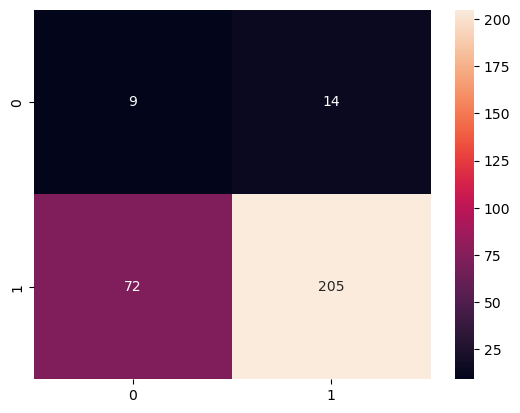

In [65]:
print(f'Accuracy score: {metrics.accuracy_score(svc_y_pred,y_test)}')
print(f'Confusion Matrix: {metrics.confusion_matrix(svc_y_pred,y_test)}')
print(metrics.classification_report(svc_y_pred,y_test))
sns.heatmap(metrics.confusion_matrix(svc_y_pred,y_test),annot=True,fmt='d')

## LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
lr_y_pred = lr.predict(X_test)
lr_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

## AdaBoost: Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [69]:
abc_y_pred = abc.predict(X_test)
abc_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

#### View scores of the different models 

In [70]:
print(f'Random Forest Classifier - Accuracy score: {metrics.accuracy_score(y_pred,y_test)}')
print(f'SupportVectorClassifier - Accuracy score: {metrics.accuracy_score(svc_y_pred,y_test)}')
print(f'LogisticRegression - Accuracy score: {metrics.accuracy_score(lr_y_pred,y_test)}')
print(f'AdaBoost: Classifier - Accuracy score: {metrics.accuracy_score(abc_y_pred,y_test)}')

Random Forest Classifier - Accuracy score: 0.74
SupportVectorClassifier - Accuracy score: 0.7133333333333334
LogisticRegression - Accuracy score: 0.7
AdaBoost: Classifier - Accuracy score: 0.7533333333333333


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [71]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [72]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [73]:
model = LogisticRegression()
model.fit(X_pca, y)

LogisticRegression()

In [74]:
pca.n_components_

17

In [75]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [76]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [77]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [78]:
logisticRegr.fit(train_X,y_train)

LogisticRegression()

In [79]:
import pickle 
pickle_out = open("logisticRegr.pkl","wb")
pickle.dump(logisticRegr, pickle_out)
pickle_out.close()

In [80]:
# Add this to your training code:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [81]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)  
    
with open('pca.pkl', 'wb') as f:  
    pickle.dump(pca, f)      

In [82]:
pred_y = logisticRegr.predict(test_X)

In [83]:
X.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'business', 'car',
       'domestic appliances', 'education', 'furniture/equipment', 'radio/TV',
       'repairs', 'vacation/others'],
      dtype='object')

In [84]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [85]:
#Confusion Matrix
from sklearn import metrics


In [86]:
print(f'Confusion Matrix: {metrics.confusion_matrix(pred_y,y_test)} ')

Confusion Matrix: [[ 11  20]
 [ 70 199]] 


## Model Deployment With Streamlit

In [87]:
%%writefile german_credit_risk_app.py
# SECTION 1: IMPORTS
import streamlit as st
import pickle
import numpy as np

# SECTION 2: MODEL LOADING
def load_artifacts():
    try:
        # Load model
        with open("logisticRegr.pkl", 'rb') as file:
            model = pickle.load(file)
        
        # Try to load scaler and PCA, but handle if they're missing or wrong
        scaler = None
        pca = None
        
        try:
            with open("scaler.pkl", 'rb') as file:
                scaler = pickle.load(file)
        except:
            st.warning("Scaler not found or invalid ")
            
        try:
            with open("pca.pkl", 'rb') as file:
                pca = pickle.load(file)
        except:
            st.warning("PCA not found or invalid ")
            
        return model, scaler, pca
        
    except FileNotFoundError as e:
        st.error(f"Model file not found: {e}")
        return None, None, None
    except Exception as e:
        st.error(f"Error loading artifacts: {e}")
        return None, None, None

model, scaler, pca = load_artifacts()
# SECTION 3: ENCODING FUNCTIONS
def sexEncode(sex_input):
    sex_input = sex_input.lower().strip()
    if sex_input == "male":
        return 1
    else:
        return 0

def housingEncode(housing_input):
    housing_input = housing_input.lower().strip()
    if housing_input == "own":
        return 1
    elif housing_input == "free":
        return 0
    else:
        return 2

def savingAccountsEncode(savings_input):
    savings_input = savings_input.lower().strip()
    if savings_input == "little":
        return 1
    elif savings_input == "moderate":
        return 2
    elif savings_input == "quite rich":
        return 3
    elif savings_input == "rich":
        return 4
    elif savings_input == "":
        return 0
    else:
        return 0

def checkingAccountEncode(checking_input):
    checking_input = checking_input.lower().strip()
    if checking_input == "little":
        return 1
    elif checking_input == "moderate":
        return 2
    elif checking_input == "rich":
        return 3
    else:
        return 0

def purposeEncode(purpose_input):
    purpose_categories = ['radio/TV', 'education', 'furniture/equipment', 'car', 
                         'business', 'domestic appliances', 'repairs', 'vacation/others']
    purpose_values = [0.0] * len(purpose_categories)
    
    purpose_input = purpose_input.strip().lower()
    for i, category in enumerate(purpose_categories):
        if purpose_input == category.lower():
            purpose_values[i] = 1.0
            break
    
    return purpose_values

def resultOutput(result):
    return "bad" if result == 0 else "good"

# SECTION 4: PREDICTION FUNCTION
def riskPrediction(id_input, age_input, sex_input, job_input, housing_input,savings_input, checking_input, credit_input, duration_input, purpose_input):
    try:
        st.write("Starting prediction...")

        # Convert and encode inputs
        id_value = float(id_input)
        age_value = float(age_input)
        sex_value = sexEncode(sex_input)
        job_value = float(job_input)
        housing_value = housingEncode(housing_input)
        savings_value = savingAccountsEncode(savings_input)
        checking_value = checkingAccountEncode(checking_input)
        credit_value = float(credit_input)
        duration_value = float(duration_input)
        purpose_values = purposeEncode(purpose_input)

        # Prepare input vector
        input_data = np.array([[id_value, age_value, sex_value, job_value, housing_value,savings_value, checking_value, credit_value, duration_value] + purpose_values])

        st.write("Raw input features:", input_data)

        # Check if scaler and PCA are valid objects with transform method
        if scaler is None or not hasattr(scaler, 'transform'):
            return "Error: Scaler not available or invalid. Please check scaler.pkl file.", None
            
        if pca is None or not hasattr(pca, 'transform'):
            return "Error: PCA not available or invalid. Please check pca.pkl file.", None

        # Proper preprocessing pipeline
        scaled_data = scaler.transform(input_data)
        st.write("Scaled features:", scaled_data)
        
        pca_data = pca.transform(scaled_data)
        st.write("PCA transformed features:", pca_data)
        
        # Make prediction
        prediction = model.predict(pca_data)
        probabilities = model.predict_proba(pca_data)
        predicted_risk = int(prediction[0])
        confidence_good = probabilities[0][1]

        st.write("Raw Prediction Output:", prediction)
        st.write("Prediction Probabilities:", probabilities)
        st.write(f"Confidence in 'good': {confidence_good:.4f}")

        return predicted_risk, confidence_good

    except Exception as e:
        return f"Prediction Error: {e}", None

# SECTION 5: MAIN APPLICATION
def main():
    st.title("Credit Risk Analysis")

    # Input fields (same as before)
    id_input = st.number_input('Enter Id', step=1, value=1)
    age_input = st.number_input('Enter Age', min_value=18, max_value=100, step=1, value=35)
    sex_input = st.text_input('Enter Gender (Male / Female)', value='Male')
    job_input = st.number_input('Enter Job (0,1,2,3)', min_value=0, max_value=3, step=1, value=2)
    housing_input = st.text_input('Enter Housing Type (own, free, rent)', value='own')
    savings_input = st.text_input("Enter Savings Accounts ('little', 'quite rich', 'rich', 'moderate')", value='moderate')
    checking_input = st.text_input("Enter Checking Accounts ('little', 'moderate', 'rich')", value='moderate')
    credit_input = st.number_input('Enter Credit Amount', min_value=0.0, step=100.0, value=2000.0)
    duration_input = st.number_input('Enter Duration', min_value=0, step=1, value=12)
    purpose_input = st.selectbox("Enter Purpose",('radio/TV', 'education', 'furniture/equipment', 'car','business', 'domestic appliances', 'repairs', 'vacation/others'))

    if st.button('Predict Risk'):
        # Validation checks
        if id_input == 0:
            st.warning("Please enter your ID first.")
        elif age_input == 0:
            st.warning("Please enter your age first.")
        elif sex_input.strip() == "":
            st.warning("Please enter your gender first.")
        elif housing_input.strip() == "":
            st.warning("Please enter your housing detail first.")
        elif credit_input == 0:
            st.warning("Please enter your credit amount first.")
        elif duration_input == 0:
            st.warning("Please enter duration first.")
        else:
            result, confidence = riskPrediction(id_input, age_input, sex_input, job_input, housing_input,savings_input, checking_input, credit_input, duration_input, purpose_input)
    
            if isinstance(result, str) and (result.startswith("Error") or result.startswith("Prediction Error")):
                st.error(result)
            else:
                result_output = resultOutput(result)
                
                # Display results with confidence
                if result_output == "good":
                    st.success(f"Credit Risk Prediction: {result_output.upper()}")
                    st.metric("Confidence", f"{confidence:.1%}")
                else:
                    st.error(f"Credit Risk Prediction: {result_output.upper()}")
                    st.metric("Confidence", f"{confidence:.1%}")


if __name__ == '__main__':
    main()

Overwriting german_credit_risk_app.py


In [88]:
import sys
!{sys.executable} -m streamlit run german_credit_risk_app.py

^C


In [89]:
""" X columns needed =  
Id : number to enter,
Age : number to enter,
Sex : Male or female ,
Job : [2, 1, 3, 0] ,
Housing : [own,free,rent] need to encode into [1,0,2] ,
Savings accounts : ['Unknown' 'little' 'quite rich' 'rich' 'moderate'] need to encode into [0, 1, 3, 4, 2], if no value entered return 0
Checking account : ['little' 'moderate' 'Unknown' 'rich'] need to encode into [1, 2, 0, 3],
Credit amount : number to enter ,
Duration : number to enter ,
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others'] needed to make a dropdown and based on the value selected the value should be considered as one of the independent feature 
"""

" X columns needed =  \nId : number to enter,\nAge : number to enter,\nSex : Male or female ,\nJob : [2, 1, 3, 0] ,\nHousing : [own,free,rent] need to encode into [1,0,2] ,\nSavings accounts : ['Unknown' 'little' 'quite rich' 'rich' 'moderate'] need to encode into [0, 1, 3, 4, 2], if no value entered return 0\nChecking account : ['little' 'moderate' 'Unknown' 'rich'] need to encode into [1, 2, 0, 3],\nCredit amount : number to enter ,\nDuration : number to enter ,\nPurpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'\n 'domestic appliances' 'repairs' 'vacation/others'] needed to make a dropdown and based on the value selected the value should be considered as one of the independent feature \n"

In [90]:
"""Y column = Risk : [Good,Bad] """

'Y column = Risk : [Good,Bad] '

In [91]:
"""purchase_selection = st.selectbox(
    "purchase",
    ('radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others')
) """

'purchase_selection = st.selectbox(\n    "purchase",\n    (\'radio/TV\', \'education\', \'furniture/equipment\', \'car\', \'business\', \'domestic appliances\', \'repairs\', \'vacation/others\')\n) '

***

# <span style = "color:coral"> Great Job!  You Have Succesfully deployed your ML Model</span>